In [1]:
cd ..

/home/aiteam/tykim/generative/gan/PTI


In [2]:
import os

from PIL import Image

IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP', '.tiff'
]


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)
def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir
    for root, _, fnames in sorted(os.walk(dir)):
        for fname in fnames:
            if is_image_file(fname):
                path = os.path.join(root, fname)
                fname = fname.split('.')[0]
                images.append((fname, path))
    return images

In [3]:
source_root = '/home/aiteam/tykim/generative/gan/PTI/images/aligned/0'
source_paths = sorted(make_dataset(source_root))

AssertionError: /home/aiteam/tykim/generative/gan/PTI/images/aligned/0 is not a valid directory

In [5]:
source_paths[0]

('iu', '/home/aiteam/tykim/generative/gan/PTI/images/aligned/0/iu.jpeg')

In [3]:
import dlib
import glob
import os
from tqdm import tqdm
from utils.alignment import align_face

In [21]:
images_path = '/home/aiteam/tykim/generative/gan/PTI/images/iu-2'# '/disk2/danielroich/Sandbox/Data/Images/barcelona'
SHAPE_PREDICTOR_PATH = 'pretrained_models/shape_predictor_68_face_landmarks.dat'
IMAGE_SIZE = 512

In [22]:
predictor = dlib.shape_predictor(SHAPE_PREDICTOR_PATH)

RuntimeError: Unable to open pretrained_models/shape_predictor_68_face_landmarks.dat

In [23]:
os.chdir(images_path)

In [8]:
images_names = glob.glob(f'*')

In [9]:
images_names

['aligned',
 '20221013_174201.jpg',
 '20221013_174239.jpg',
 '20221013_174213.jpg',
 '20221013_174216.jpg',
 '20221013_174150.jpg',
 '20221013_174207.jpg',
 '20221013_174212.jpg']

In [12]:
img = dlib.load_rgb_image(f'{images_path}/{image_name}')

In [14]:
img.shape

(2208, 2944, 3)

In [11]:
f'{images_path}/{image_name}'

'/home/aiteam/tykim/generative/gan/PTI/images/me/20221013_174212.jpg'

In [16]:
import PIL
import PIL.Image

In [17]:
img = PIL.Image.open(f'{images_path}/{image_name}')

In [20]:
import numpy as np

np.float32(img).shape

(2208, 2944, 3)

In [10]:
aligned_images = []
for image_name in tqdm(images_names):
    try:
        aligned_image = align_face(filepath=f'{images_path}/{image_name}',
                                       predictor=predictor, output_size=IMAGE_SIZE)
        aligned_images.append(aligned_image)
    except Exception as e:
        print(e)

 12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]

Unknown image file format: Unable to load image in file /home/aiteam/tykim/generative/gan/PTI/images/me/aligned


 25%|██▌       | 2/8 [00:03<00:12,  2.13s/it]

local variable 'shape' referenced before assignment


 38%|███▊      | 3/8 [00:06<00:13,  2.65s/it]

local variable 'shape' referenced before assignment


 50%|█████     | 4/8 [00:10<00:11,  2.90s/it]

local variable 'shape' referenced before assignment


 62%|██████▎   | 5/8 [00:13<00:09,  3.04s/it]

local variable 'shape' referenced before assignment


 75%|███████▌  | 6/8 [00:16<00:06,  3.11s/it]

local variable 'shape' referenced before assignment


 88%|████████▊ | 7/8 [00:20<00:03,  3.16s/it]

local variable 'shape' referenced before assignment


100%|██████████| 8/8 [00:23<00:00,  2.92s/it]

local variable 'shape' referenced before assignment


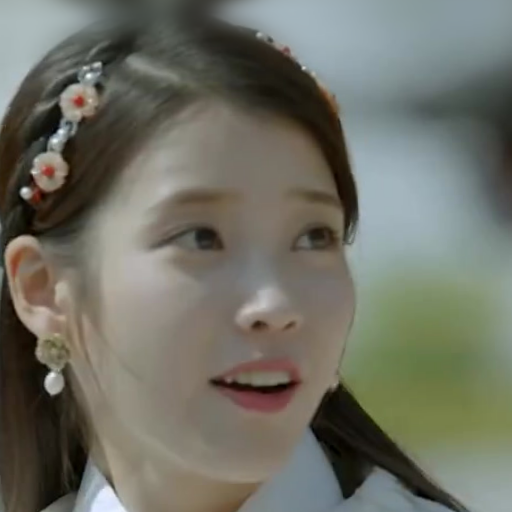

In [12]:
aligned_images[2]

In [10]:
os.makedirs(f'{images_path}/aligned', exist_ok=True)
os.makedirs(f'{images_path}/aligned/0', exist_ok=True)

In [11]:
for image, name in zip(aligned_images,images_names):
    real_name = name.split('.')[0]
    try:
        image.save(f'{images_path}/aligned/0/{real_name}.jpg')
    except Exception as e:
        print(e)